![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('C:/Users/lili/Documents/Maestría/Machine learning y lenguaje natural/S1/Taller/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
# Visualización de los datos
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [8]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  total       10886 non-null  int64  
 11  hour        10886 non-null  int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 1.0 MB


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

El dataset tiene un total de 10.886 resgistros y un total de 12 variables continuas. Sin embargo, se debe aclarar que las variables season.	holiday, workingday y weather son variables categóricas que asignan un número a cada clase.

Cuando se revisa en detalle la media del 'Total' de cada categoría de la variable 'Season', se observa que Season-1 tiene el menor valor Total en promedio con 116.3 y Season-3 tiene el mayor valor total en promedio con 234.41. Se destaca que de los 4 grupos disponibles en 'Season', cada uno presenta una marcada diferenciación respecto al valor 'Total' promedio. 

Por otro lado, al analizar el valor promedio del 'Total' de bicicletas rentadas según la hora del registro, se observa una tendencia creciente en la cantidad desde las 10 de la mañana hasta la 6 de la tarde, para luego disminuir desde las 7 de la noche hasta a las 6 de la mañana. Sin embargo, la tendencia creciente mencionada no es exacta ya que presenta algunos saltos, como se encuentra en la variabilidad del promedio Total presentado en las 10 primeras horas de la mañana. También se destaca la alta variabilidad que tiene la columna 'Hora', al presentar un coeficiente de variación de 59.9%.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

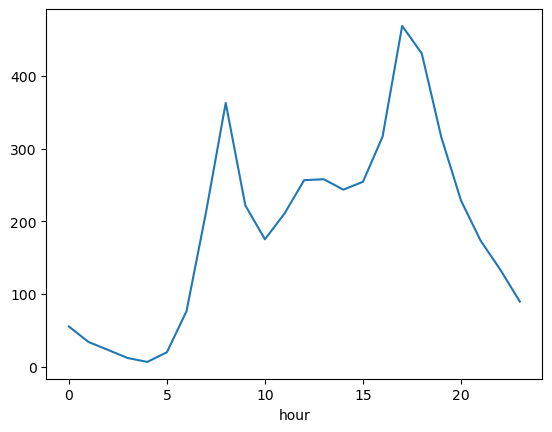

In [9]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

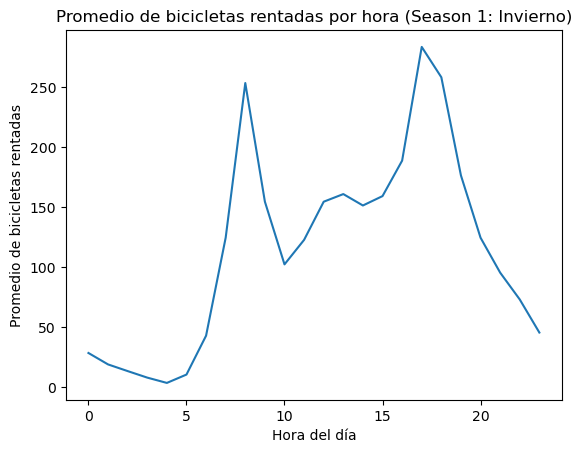

In [12]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

import matplotlib.pyplot as plt
promedio_bicicletas_por_hora = bikes.loc[bikes['season'] == 1].groupby('hour')['total'].mean()
promedio_bicicletas_por_hora.plot()

plt.xlabel('Hora del día')
plt.ylabel('Promedio de bicicletas rentadas')
plt.title('Promedio de bicicletas rentadas por hora (Season 1: Invierno)')

# Mostramos el gráfico
plt.show()

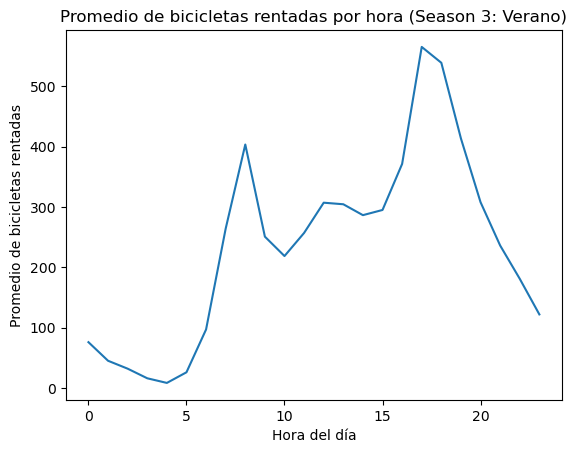

In [13]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
import matplotlib.pyplot as plt
promedio_bicicletas_por_hora = bikes.loc[bikes['season'] == 3].groupby('hour')['total'].mean()
promedio_bicicletas_por_hora.plot()

plt.xlabel('Hora del día')
plt.ylabel('Promedio de bicicletas rentadas')
plt.title('Promedio de bicicletas rentadas por hora (Season 3: Verano)')

# Mostramos el gráfico
plt.show()

El primer gráfico que refleja el promedio de bicicletas rentadas por hora, permite apreciar claramente que el mayor número se renta entre las 7 de la mañana y la 6 de la tarde, con dos picos principales entre la 7 y 8 de la mañana, y el máximo entre 6 y 7 de la noche con mas de 400 bicicletas en promedio.

Al realizar el mismo análisis distinguiendo entre las estaciones del año se observa lo siguiente:

* En invierno el máximo número promedio de bicicletas por hora, desciende a poco más de 250. Una marcada diferencia con las el promedio de bicicletas rentadas en verano donde su máximo supera las 500 bicicletas en promedio. Respecto a las horas se observan comportamientos similares en las dos estaciones, solo se destaca que en cada una de las horas en invierno se rentan aproximadamente la mitad de las bicicletas rentadas en verano.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [32]:
# Celda 3
X = bikes[['season', 'hour']]

# Variable dependiente
y = bikes['total']

# Inicializamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

print('Intercepto:', modelo.intercept_)
print('Coeficientes:', modelo.coef_)


Intercepto: 2.5848513346807067
Coeficientes: [26.95130851 10.52129824]


In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# Predicciones del modelo
y_pred = modelo.predict(X)
# Calcular R cuadrado
r2 = r2_score(y, y_pred)

# Calcular MSE y MAE
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)

print('R cuadrado:', r2)
print('MSE:', mse)
print('MAE:', mae)
rmse = math.sqrt(mse)
print('RMSE:', rmse)

R cuadrado: 0.18805882759715709
MSE: 26640.032544576763
MAE: 122.05378894303357
RMSE: 163.21774580166448


In [16]:
import statsmodels.api as sm

# Agregamos una columna de intercepto a la matriz de diseño
X = sm.add_constant(X)

# Ajustamos el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Imprimimos los resultados detallados
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     1260.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:35:36   Log-Likelihood:                -70912.
No. Observations:               10886   AIC:                         1.418e+05
Df Residuals:                   10883   BIC:                         1.419e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5849      4.662      0.554      0.5

El modelo de regresión lineal aplicado al total de los datos refleja un bajo poder preditivo explicando solamente el 18.8% de la variabilidad de los datos. Pese a que las variables explicativas 'Season' y 'Hour' resultan significativas, al explicar tan poca variabilidad de la cantidad de bicicletas rentadas se presenta una alta raiz del error cuadrático medio con 163.2. 

Al analizar los coeficientes de cada variable se encuentra:
* Por cada unidad que incremente 'Season', el número de bicicletas rentadas se incrementa 26.9. Sin embargo, al ser 'Season' una variable en realidad categórica, el modelo de regresión lineal no puede recoger apropiadamente el comportamiento asociado a cada una de las estaciones del año.
* Respecto a la variable 'hour' se observa que por cada hora que incrementa el número de bicicletas rentadas aunmenta 10.52. Lo anterior no es preciso respecto al comportamiento visto en los gráficos, ya que las bibletas rentadas por hora no exhiben una tendencia lineal, por lo cual no sería el más apropiado.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

#### Variable 'hour'

In [27]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

# Impresión variable a usar (Hits)
j = 2
print(X.columns[j])

# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]

y.mean(), y_l.mean(), y_r.mean()

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

hour


In [28]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [2, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [2, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [2, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [1, 2.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 122.27826086956522,
    'level': 3,
    'split': -1,
    'n_samples': 113,
    'gain': 0},
   'sr': {'y_pred': 1,
    'y_pr

#### Arbol de decisión manual para las dos variables

In [29]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = list(X.columns)
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las variables
    for j in features:
        # Para la variable 'hour' usamos el mismo enfoque original
        if j == 'hour':
            splits = np.percentile(X[j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
            splits = np.unique(splits)[1:]
            for split in splits:
                gain = gini_impurity(X[j], y, split)
                if gain > best_split[2]:
                    best_split = [j, split, gain]
        # Para la variable 'season' tratamos cada valor como un posible punto de división
        elif j == 'season':
            for split in X[j].unique():
                gain = gini_impurity(X[j], y, split)
                if gain > best_split[2]:
                    best_split = [j, split, gain]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    if j == 'hour':
        filter_l = X[j] < split
    else:  # Si es 'season', simplemente filtramos los valores
        filter_l = X[j] == split
    
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree


In [30]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': ['hour', 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': ['hour', 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': ['hour', 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': ['season', 2],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 228.26724137931035,
    'level': 3,
    'split': -1,
    'n_samples': 114,
    'gain': 0},
   'sr': {'y

In [36]:
from sklearn.metrics import accuracy_score

# Definir la función para hacer predicciones utilizando el árbol creado
def predict_tree(tree, X):
    if tree['split'] == -1:  # Si es un nodo terminal
        return tree['y_pred'] * np.ones(X.shape[0], dtype=int)  # Predicción constante
    else:
        if tree['split'][0] == 'hour':
            filter_l = X[tree['split'][0]] < tree['split'][1]
        else:
            filter_l = X[tree['split'][0]] == tree['split'][1]
        return np.where(filter_l, predict_tree(tree['sl'], X), predict_tree(tree['sr'], X))

# Hacer predicciones utilizando el árbol creado
predictions = predict_tree(tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10), X)

# Calcular el accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy del modelo de árbol de decisión:", accuracy)

Accuracy del modelo de árbol de decisión: 0.009645416130810215


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [39]:
X

,season,hour
datetime,,
2011-01-01 00:00:00,1,0
2011-01-01 01:00:00,1,1
2011-01-01 02:00:00,1,2
2011-01-01 03:00:00,1,3
2011-01-01 04:00:00,1,4
...,...,...
2012-12-19 19:00:00,4,19
2012-12-19 20:00:00,4,20
2012-12-19 21:00:00,4,21


Text(0, 0.5, 'Accuracy')

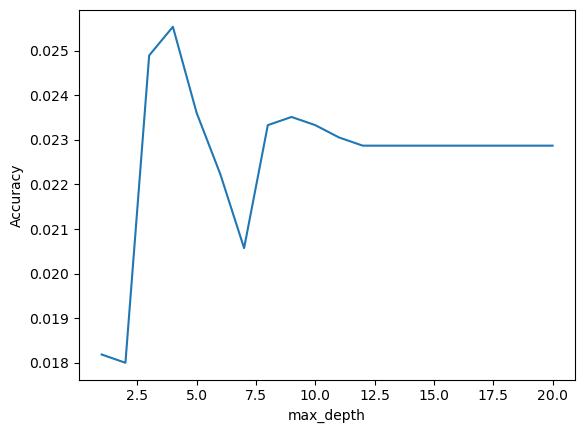

In [34]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=20, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [35]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.0255354492714517, 4)

Al evaluar los modelos mediante el accuracy, se observa que el modelo generado mediante sklearn mejora considerablemente el desempeño del arbol de decisión pasando de 0.9% (modelo manual) a 2.5%. Sin embargo, ambos modelos tienen un pésimo desempeño como si las variables explicativas elegidas fueran insuficientes para explicar el número de bicicletas rentadas. Sin embargo, no se esperaba que los modelos de arboles de decisión presentaran un desempeño tan inferior al modelo de regresión lineal, por lo que se debe evaluar posibles fallas en el desarrollo del ejercicio.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [40]:
# Lectura de la información de archivo .csv
df = pd.read_csv('C:/Users/lili/Documents/Maestría/Machine learning y lenguaje natural/S1/Taller/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [41]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [42]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [46]:
# Celda 6
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
# Calibración de parámetros
param_grid = {
    'max_depth': [None, 2, 3, 5, 10, 20],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Predicción y evaluación
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Mejores parámetros:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("F1-score:", f1)

Mejores parámetros: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6453333333333333
F1-score: 0.6453289196958572


In [47]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de regresión logística
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1-score:", f1)


Accuracy: 0.614
F1-score: 0.6139442402562681


Una vez calibrados los parámetros, el arbol de decisión ofrece un mejor accuracy con un 64.5% de predicciones correctas respecto al 61,4% de la regresión logística. De igual manera, el F1-Score del arbol de decisión es mejor mostrando un mejor balance entre precisión y recall con un 64.5% respecto al 61.3% de la regresión logística. 

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9